In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report


In [4]:
df = pd.read_csv("bank-full.csv",sep=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df['y'] = df['y'].map({'yes':1,"no":0})

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [13]:
num_feat = df.select_dtypes(include=['int64','Float64']).columns
cat_feat = df.select_dtypes(include=['object']).columns

In [14]:
num_feat,cat_feat

(Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
        'y'],
       dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome'],
       dtype='object'))

In [17]:
corr_with_traget = df[num_feat].corr()['y'].sort_values(ascending=False)
corr_with_traget

y           1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y, dtype: float64

In [18]:
df.groupby('job')['y'].mean().sort_values(ascending=False)

job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137556
admin.           0.122027
self-employed    0.118429
unknown          0.118056
technician       0.110570
services         0.088830
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.072750
Name: y, dtype: float64

In [19]:
for col in cat_feat:
    print(f"Subscription rate by {col}")
    print(df.groupby(col)['y'].mean().sort_values(ascending=False))

Subscription rate by job
job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137556
admin.           0.122027
self-employed    0.118429
unknown          0.118056
technician       0.110570
services         0.088830
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.072750
Name: y, dtype: float64
Subscription rate by marital
marital
single      0.149492
divorced    0.119455
married     0.101235
Name: y, dtype: float64
Subscription rate by education
education
tertiary     0.150064
unknown      0.135703
secondary    0.105594
primary      0.086265
Name: y, dtype: float64
Subscription rate by default
default
no     0.117961
yes    0.063804
Name: y, dtype: float64
Subscription rate by housing
housing
no     0.167024
yes    0.077000
Name: y, dtype: float64
Subscription rate by loan
loan
no     0.126557
yes    0.066814
Name: y, dtype: float64
Subscription rate by contact
contact
cellular     0.149189
telephone    0.134205
unkn

In [21]:
(df == 'unknown').sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [22]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

In [25]:
encoder = OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False)
encoded_data = encoder.fit_transform(df[cat_feat])
encooded_df = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(cat_feat),index=df.index)

In [26]:
df_encoded = pd.concat([df.drop(columns=cat_feat),encooded_df],axis=1) 

In [27]:
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [31]:
df_model = DecisionTreeClassifier(max_depth=5,random_state=42)

In [32]:
df_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:
y_train_pred = df_model.predict(X_train)
y_test_pred  = df_model.predict(X_test)

In [34]:
print("Training accuracy :",accuracy_score(y_train,y_train_pred))
print("Test accuracy :",accuracy_score(y_test,y_test_pred))

Training accuracy : 0.9046118115461181
Test accuracy : 0.8983744332632976


In [36]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.64      0.30      0.41      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

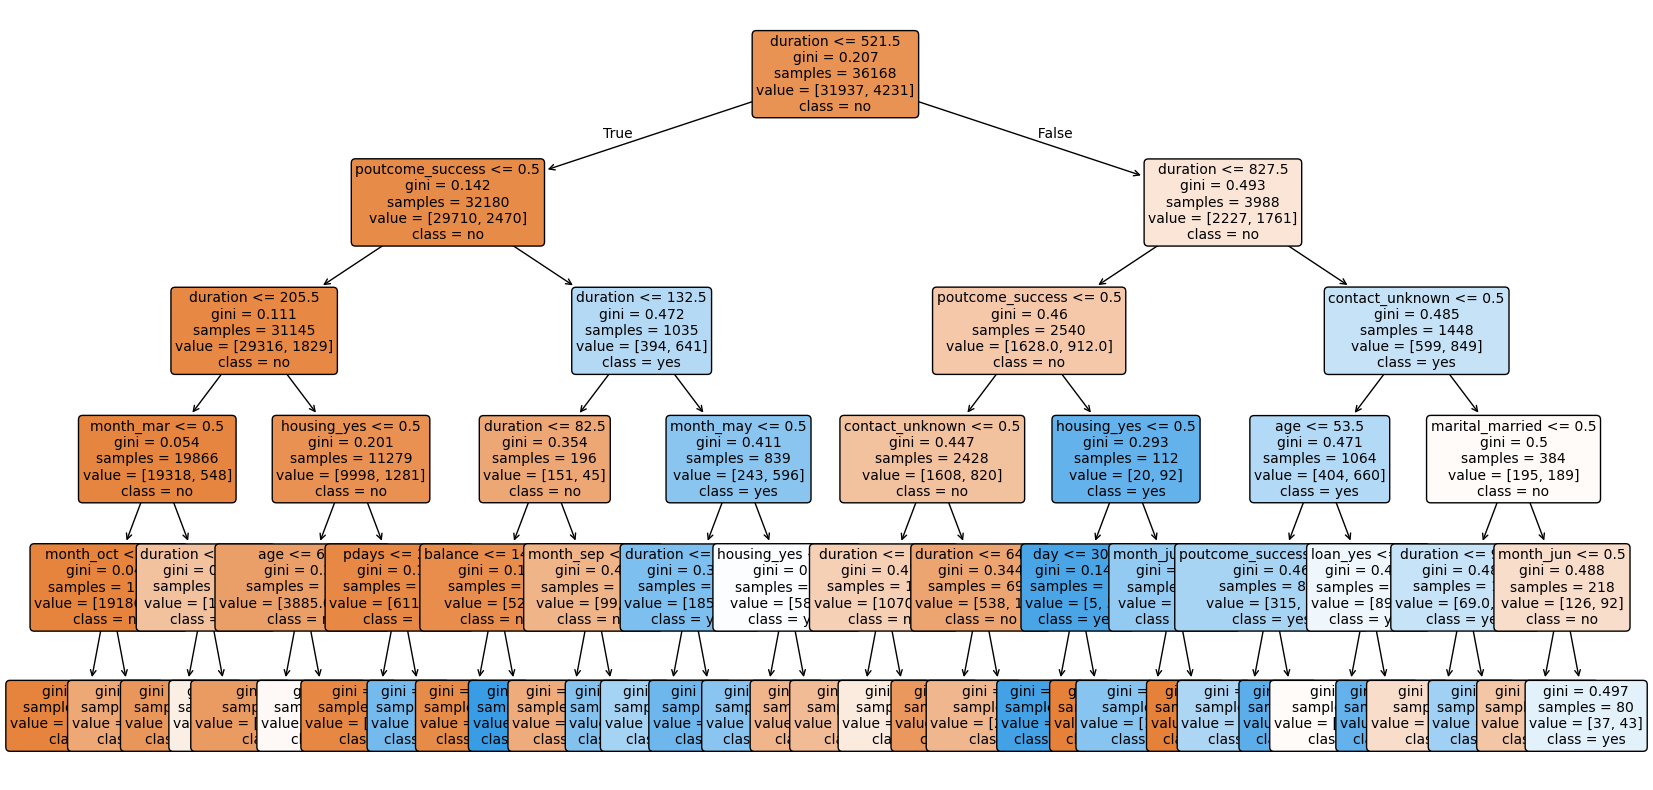

In [38]:
plt.figure(figsize=(20,10))
plot_tree(
    df_model,
    feature_names=X_train.columns,
    class_names=['no','yes'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.show()

In [40]:
y_test_pred = df_model.predict(X_test)

In [43]:
print(classification_report(y_test,y_test_pred,target_names=['no','yes']))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7985
         yes       0.64      0.30      0.41      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [44]:
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)

In [45]:
print(f"training accuracy:{train_acc:.4f}")
print(f"test accuracy :{test_acc:.4f}")

training accuracy:0.9046
test accuracy :0.8984
